# Bioresponse
https://www.kaggle.com/c/bioresponse/data

This data has biological response **Activity** in the first column as [1,0]. The remaining columns are descriptors (d1 through d1776), where each row in this dataset represents a molecule.Each molecule has a response (Activity) value associated to it, these descriptor has some information of the molecule  - for example size, shape, or elemental constitution.

## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## File import
There are two input csv files, one is for training with labelled response data and other is for testing the model.

In [2]:
file=pd.read_csv('train.csv')

In [66]:
test=pd.read_csv('test.csv')

In [4]:
test.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0.0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0.0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0.0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0.0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0.0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


In [5]:
file.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


## Scaling and standardisation

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
x=file.drop('Activity', axis=1)
y=file['Activity']

In [56]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
#Splitting the train data into training and testing data using train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [31]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775
0,-0.962112,-0.901566,0.406335,-0.336495,-0.771664,-0.109575,-0.017182,0.800886,-0.081646,-0.283699,...,-0.166347,-0.121988,-0.118566,-0.149497,-0.124219,-0.130700,-0.111426,-0.108947,-0.143806,-0.106413
1,3.622473,0.130899,-0.231390,-0.336495,-0.983668,1.484291,-1.873312,-0.266603,1.214430,-1.705571,...,6.011540,8.197561,8.434134,6.689088,-0.124219,7.651123,-0.111426,-0.108947,6.953795,-0.106413
2,-0.545748,-1.061088,-0.869114,-0.336495,-0.022620,-0.969645,0.908173,0.384653,-0.982879,0.852064,...,-0.166347,-0.121988,-0.118566,-0.149497,-0.124219,-0.130700,-0.111426,-0.108947,-0.143806,-0.106413
3,-0.962112,-0.506505,-0.869114,3.978691,-0.153712,0.477511,-0.434494,-1.022490,0.775435,-0.639053,...,-0.166347,-0.121988,-0.118566,-0.149497,-0.124219,-0.130700,-0.111426,-0.108947,-0.143806,-0.106413
4,0.288230,-0.705193,-0.869114,-0.336495,2.755187,1.204300,-1.337163,-0.930022,0.880558,-1.511041,...,-0.166347,-0.121988,-0.118566,-0.149497,-0.124219,-0.130700,-0.111426,-0.108947,-0.143806,-0.106413


## Principal component analysis
Finding number of components to reduce dimensions.

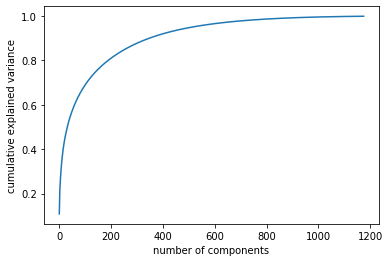

In [57]:
#Explained variance
pca = PCA(n_components=1176).fit(x)
cumpca=np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [52]:
#250 components seems to be a good number covering 90% of the varience
pca=PCA(n_components=250)

#Transforming train and test data using principal copmponents
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Decesion tree with pca
Fitting decesion tree on the principal components

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
cv_scores = cross_val_score(dt,x, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

print('Decision tree classifier (max_depth = 2)\n', confusion)
print(classification_report(y_test,tree_predicted))
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-validation scores (3-fold): [0.75059952 0.7384     0.7616    ]
Mean cross-validation score (3-fold): 0.750
Decision tree classifier (max_depth = 2)
 [[396 149]
 [163 530]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       545
           1       0.78      0.76      0.77       693

    accuracy                           0.75      1238
   macro avg       0.74      0.75      0.74      1238
weighted avg       0.75      0.75      0.75      1238

Accuracy of DT classifier on training set: 0.75
Accuracy of DT classifier on test set: 0.75


In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Decesion tree without pca

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
cv_scores = cross_val_score(dt,x, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

print('Decision tree classifier (max_depth = 2)\n', confusion)
print(classification_report(y_test,tree_predicted))
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-validation scores (3-fold): [0.75059952 0.7384     0.7616    ]
Mean cross-validation score (3-fold): 0.750
Decision tree classifier (max_depth = 2)
 [[396 149]
 [163 530]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       545
           1       0.78      0.76      0.77       693

    accuracy                           0.75      1238
   macro avg       0.74      0.75      0.74      1238
weighted avg       0.75      0.75      0.75      1238

Accuracy of DT classifier on training set: 0.75
Accuracy of DT classifier on test set: 0.75


Decision tree performs better when fitted without pca. Reduction in 10% accuracy is observed when decesion tree is fit on pca. This is likely due to the fact that there are many binary cattegorical parameters in the predictors which has low varience but has significant co-orrelation with response.

### Random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
#random forest
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
predict[1:12]

C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Cross-validation scores (3-fold): [0.75059952 0.7384     0.7616    ]
Mean cross-validation score (3-fold): 0.750
Accuracy of RF classifier on training set: 0.99
Accuracy of RF classifier on test set: 0.72


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [20]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_features = 8, random_state = 0)

cv_scores = cross_val_score(clf,x, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))


C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross-validation scores (3-fold): [0.75379696 0.7096     0.7624    ]
Mean cross-validation score (3-fold): 0.742


C:\Users\Som\Anaconda3\envs\env1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Conclusion
Decesion tree without pca performs as the best model with test accuracy of 75%. Random forest well on training data with 99% accuracy but performs poorly on test data with 72% accuracy. Therefore, decesion tree is used to generate predicted values on the test data.

In [73]:
test_prediction = dt.predict(test)

In [74]:
sum(test_prediction)

0

Decesion tree predict all the response values to be zero. Which is probably not expected. Trying random forest classifier to check for number of reponse variables as 1.

In [133]:
test_prediction = clf.predict_proba(test)

In [126]:
sum(test_prediction)

array([1092.1, 1408.9])

In [136]:
test_prediction=pd.DataFrame(test_prediction)
pred=pd.DataFrame(test_prediction[1])

In [147]:
pred.columns=['PredictedProbability']
pred.index=range(1,2502)
pred.index.name='MoleculeId'
pred.head()

,PredictedProbability
MoleculeId,
1,0.4
2,0.5
3,0.6
4,0.5
5,0.7


In [148]:
pred.to_csv('Bioresponse.csv')